In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
files = [
    r"C:\Users\kseni\Downloads\dataset\kosmetyki events\2019-Oct.csv",
    r"C:\Users\kseni\Downloads\dataset\kosmetyki events\2019-Nov.csv",
    r"C:\Users\kseni\Downloads\dataset\kosmetyki events\2019-Dec.csv",
    r"C:\Users\kseni\Downloads\dataset\kosmetyki events\2020-Jan.csv",
     r"C:\Users\kseni\Downloads\dataset\kosmetyki events\2020-Feb.csv",
]
dfs = [pd.read_csv(file) for file in files]

In [3]:
months = ['January', 'February', 'December', 'November', 'October']
for df, month in zip(dfs, months):
    df['Month'] = month

In [7]:
data = pd.concat(dfs, ignore_index=True)

In [ ]:
Podstawowe informacje o danych po połączeniu zbiorów danych dla kosmetyków

In [10]:
print("Basic information about data:")
print(data.info())
print("\nBasic statistics:\n", data.describe(include='all'))

Basic information about data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20692840 entries, 0 to 20692839
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
 9   Month          object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.5+ GB
None

Basic statistics:
                      event_time event_type    product_id   category_id  \
count                  20692840   20692840  2.069284e+07  2.069284e+07   
unique                  8782890          4           NaN           NaN   
top     2020-02-15 16:08:37 UTC       view           NaN           NaN   
freq                       3087    9657821           NaN           NaN   
mean                        NaN        NaN  5.484297e+06  1.55

Sprawdzamy brakujące wartości 

In [11]:
missing_values = data.isnull().sum()
print("\nMissing vales in data:\n", missing_values)


Missing vales in data:
 event_time              0
event_type              0
product_id              0
category_id             0
category_code    20339246
brand             8757117
price                   0
user_id                 0
user_session         4598
Month                   0
dtype: int64


Sprawdzamy i usuwamy dublikaty 

In [13]:
duplicates = data.duplicated().sum()
print("\nNumber of dublicates in data:", duplicates)
data = data.drop_duplicates()


Number of dublicates in data: 1109098


Sprawdzamy najczęściej występujące eventy. Lider - view ( 9656790). Purchase - 1286102 (13,32% )


The most common type of events (event_type):
 event_type
view                9656790
cart                5652991
remove_from_cart    2987859
purchase            1286102
Name: count, dtype: int64


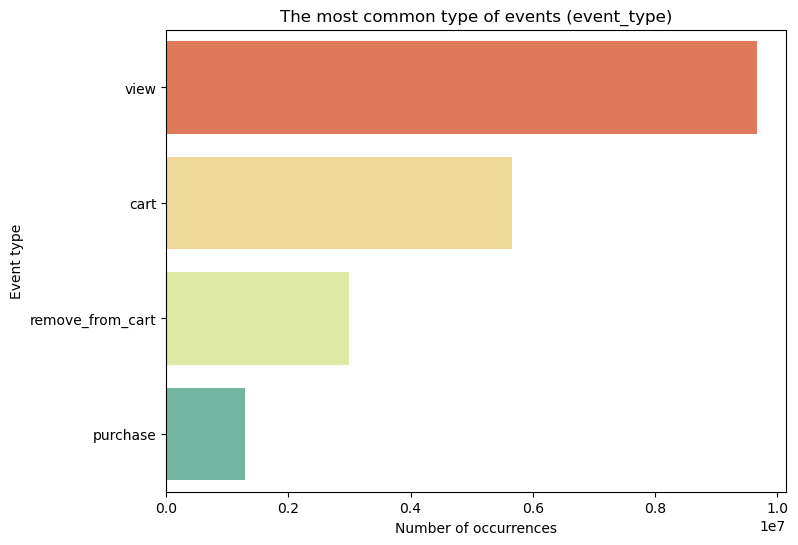

In [16]:
event_type_split = data['event_type'].value_counts()
print("\nThe most common type of events (event_type):\n", event_type_split)

plt.figure(figsize=(8, 6))
sns.barplot(x=event_type_split.values, y=event_type_split.index, palette="Spectral")
plt.title("The most common type of events (event_type)")
plt.xlabel("Number of occurrences")
plt.ylabel("Event type")
plt.show()

Sprawdzamy aktywność użytkowników w godzinach per event  


Number of events by hour:
 event_type    cart  purchase  remove_from_cart    view
hour                                                  
0            61620     11848             28425   89786
1            56975     11937             27313   76927
2            63111     12295             29548   84933
3            82305     15492             44076  122085
4           112678     22008             58029  181709
5           170800     35291             88589  273883
6           223925     50761            118891  376977
7           262246     62284            139636  455174
8           290006     70276            149936  502874
9           306068     76447            162711  529103
10          321515     79308            172025  558142
11          329989     85546            177797  574663
12          332973     83694            181523  583141
13          313406     77438            167976  559600
14          294857     71377            158892  525063
15          286569     66806         

c:\Users\kseni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kseni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


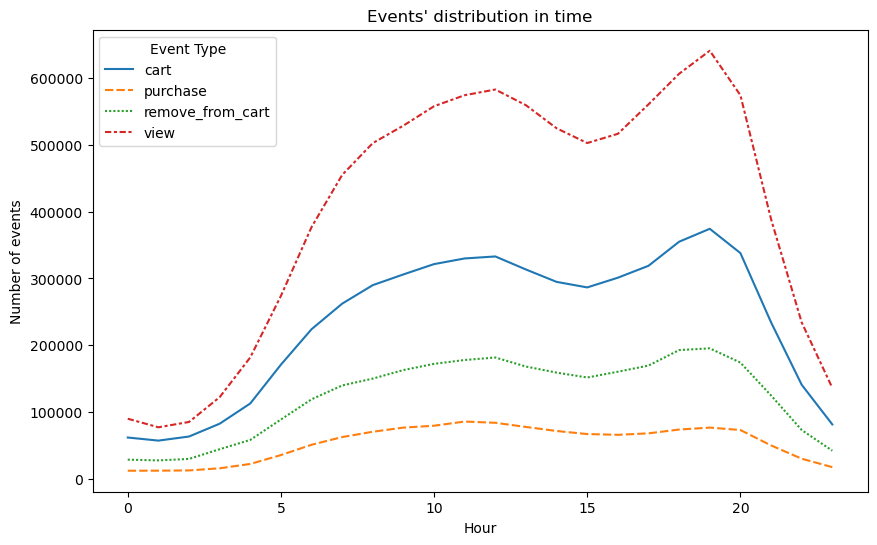

In [18]:
data['event_time'] = pd.to_datetime(data['event_time'], errors='coerce')
data['hour'] = data['event_time'].dt.hour

hourly_events = data.groupby('hour')['event_type'].value_counts().unstack(fill_value=0)
print("\nNumber of events by hour:\n", hourly_events)

plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_events)
plt.title("Events' distribution in time")
plt.xlabel("Hour")
plt.ylabel("Number of events")
plt.legend(title='Event Type', loc='upper left')
plt.show()

Sprawdzamy aktywność poszczególnych użytkowników ( wykres dla 10 z największą aktywnością)


Event freaquency per user:
 event_type  cart  purchase  remove_from_cart  view
user_id                                           
465496         0         0                 0     3
1120748        0         0                 0     1
1180452        0         0                 0     1
1458813        0         0                 0    31
2038666        0         0                 0     1


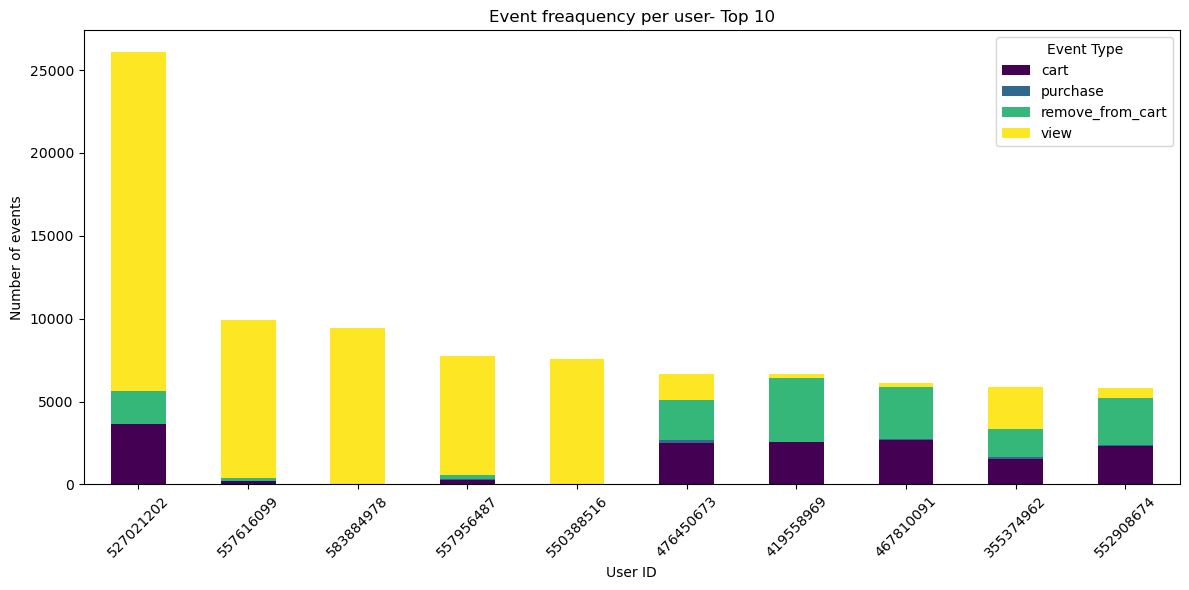

In [19]:
event_counts = data.groupby('user_id')['event_type'].value_counts().unstack(fill_value=0)
print("\nEvent freaquency per user:\n", event_counts.head())

top_users = event_counts.sum(axis=1).sort_values(ascending=False).head(10).index
top_user_data = event_counts.loc[top_users]

top_user_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Event freaquency per user- Top 10")
plt.xlabel("User ID")
plt.ylabel("Number of events")
plt.legend(title='Event Type', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Jakie marki użytkownicy kupują najczęściej


Top 10 brands with the highest number of purchases:
 brand
runail       111350
irisk         73747
masura        49566
grattol       49542
bpw.style     37941
ingarden      27401
estel         19424
uno           17586
freedecor     17467
italwax       17061
Name: count, dtype: int64


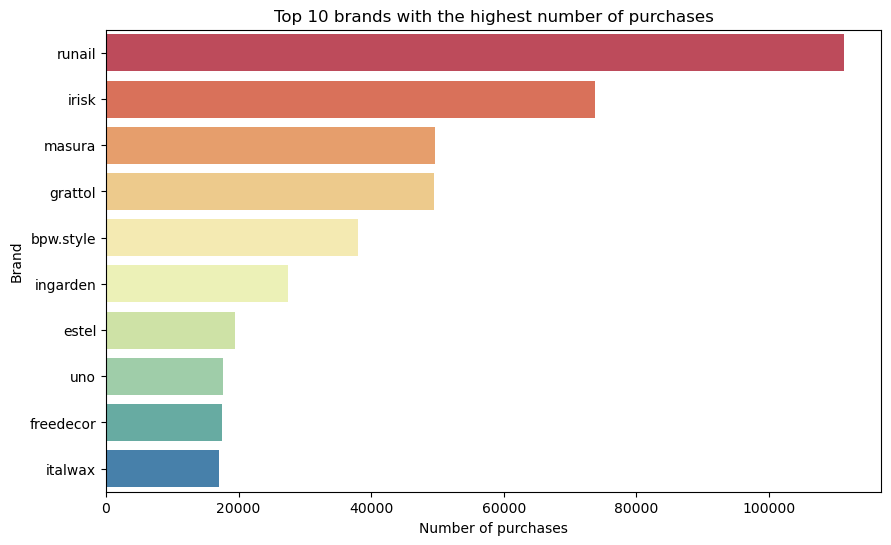

In [22]:
if 'brand' in data.columns:
    top_brands = data[data['event_type'] == 'purchase']['brand'].value_counts().head(10)
    print("\nTop 10 brands with the highest number of purchases:\n", top_brands)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_brands.values, y=top_brands.index, palette="Spectral")
    plt.title("Top 10 brands with the highest number of purchases")
    plt.xlabel("Number of purchases")
    plt.ylabel("Brand")
    plt.show()

A czy są różnice w markach kupowanych najczęściej i oglądanych najczęściej?


Brands' comparison: purchased and viewed:
            Purchased  Viewed
brand                       
runail        111350  608798
irisk          73747  409692
masura         49566  342216
grattol        49542  426211
bpw.style      37941  168642
ingarden       27401  175622
estel          19424  206016
uno            17586       0
freedecor      17467       0
italwax        17061       0
jessnail           0  172218
kapous             0  196888
concept            0  125183


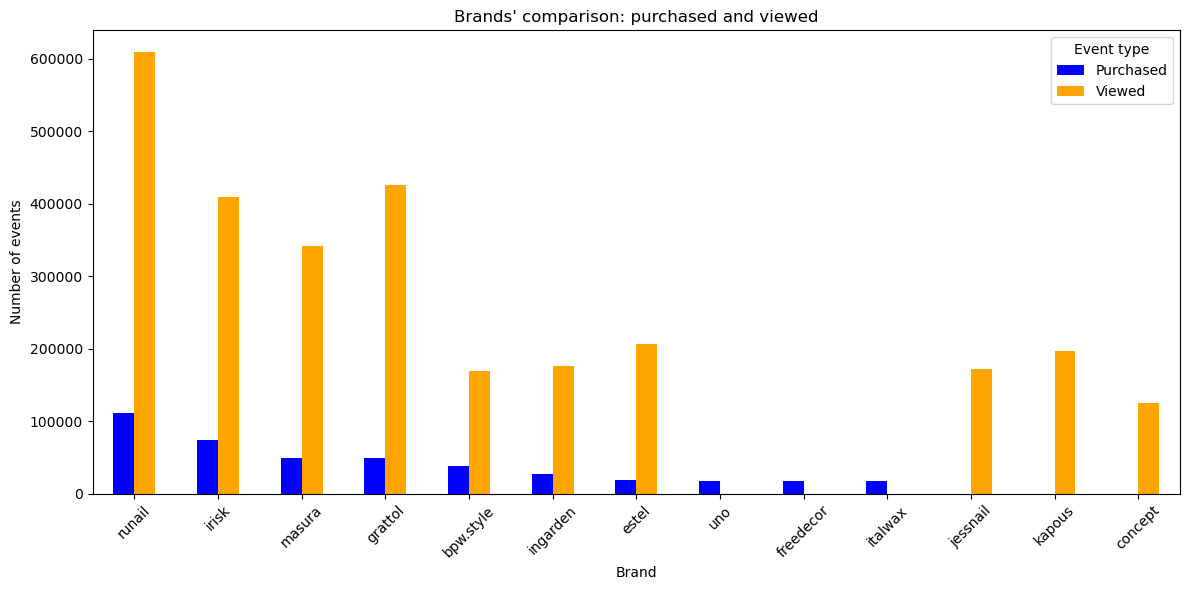

In [23]:
brands_purchase = data[data['event_type'] == 'purchase']['brand'].value_counts().head(10)
brands_view = data[data['event_type'] == 'view']['brand'].value_counts().head(10)

common_brands = set(brands_purchase.index) | set(brands_view.index) 

comparison = pd.DataFrame({
    'Purchased': brands_purchase.reindex(common_brands, fill_value=0),
    'Viewed': brands_view.reindex(common_brands, fill_value=0)
}).sort_values(by='Purchased', ascending=False)

print("\nBrands' comparison: purchased and viewed:\n", comparison)

# Wizualizacja
comparison.plot(kind='bar', figsize=(12, 6), color=['blue', 'orange'])
plt.title("Brands' comparison: purchased and viewed")
plt.xlabel("Brand")
plt.ylabel("Number of events")
plt.legend(title='Event type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Sprawdzamy najczęściej kupowane produkty (50) 


Top purchased products:
 product_id
5809910    7549
5854897    4630
5700037    3682
5802432    3533
5751422    3521
5809912    3307
5815662    3246
5304       3133
5751383    2948
5849033    2782
5792800    2711
5686925    2360
5528035    1847
5013       1842
5833330    1829
5809911    1827
5843836    1823
5816170    1802
5700046    1706
5687151    1693
5759492    1629
5729864    1607
5622677    1504
5793704    1427
5561044    1357
5862943    1357
5817702    1342
5833334    1322
5776130    1295
5649219    1286
5700035    1246
5759491    1246
4958       1245
5761411    1218
5800788    1211
5842141    1199
5833325    1198
5889300    1193
5833326    1176
4938       1167
5857360    1163
5789668    1158
5814046    1155
5783987    1132
5688124    1120
5587740    1117
5773361    1117
5816172    1113
5848387    1111
5549834    1101
Name: count, dtype: int64


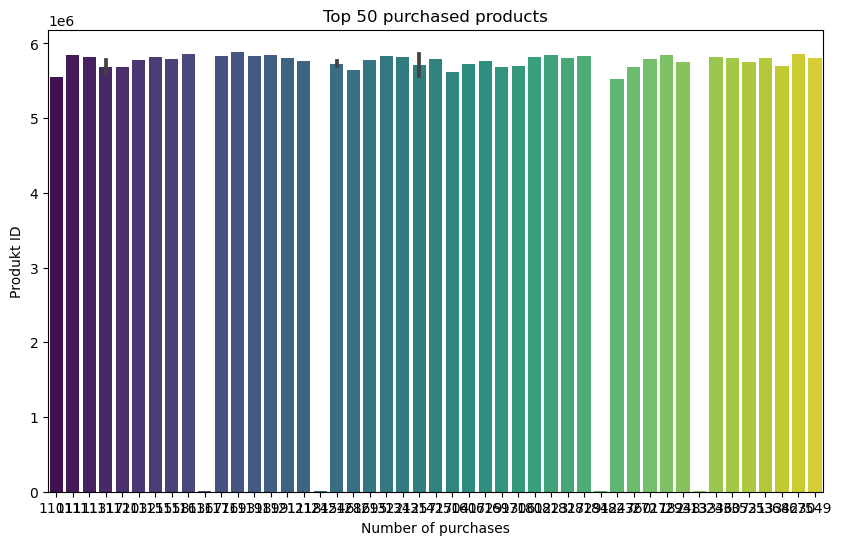

In [24]:
if 'product_id' in data.columns:
    top_products = data[data['event_type'] == 'purchase']['product_id'].value_counts().head(50)
    print("\nTop purchased products:\n", top_products)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
    plt.title("Top 50 purchased products")
    plt.xlabel("Number of purchases")
    plt.ylabel("Produkt ID")
    plt.show()

Sprawdzamy wydatki użytkowników


Average customer spend:
 count    110518.000000
mean         57.407780
std          88.581184
min         -10.520000
25%          16.220000
50%          33.170000
75%          61.477500
max        3769.490000
Name: price, dtype: float64


c:\Users\kseni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


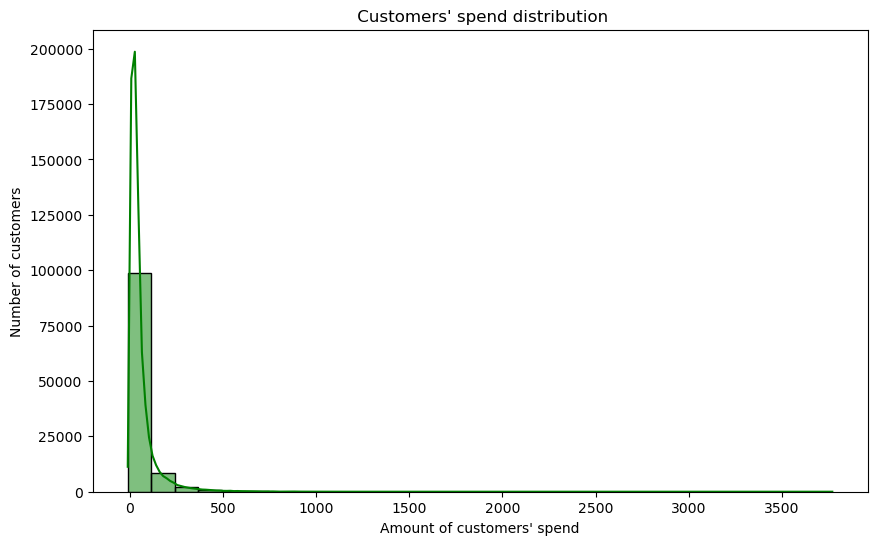

In [25]:
if 'price' in data.columns and 'event_type' in data.columns:
    customer_spending = data[data['event_type'] == 'purchase'].groupby('user_id')['price'].sum()
    print("\nAverage customer spend:\n", customer_spending.describe())

    plt.figure(figsize=(10, 6))
    sns.histplot(customer_spending, bins=30, kde=True, color='green')
    plt.title(" Customers' spend distribution")
    plt.xlabel("Amount of customers' spend")
    plt.ylabel("Number of customers")
    plt.show()